# Исследование надежности заемщиков

## Содержание исследования

1. [Цель исследования](#purpose)
2. [Обзор данных](#data_overview)
3. [Предобработка данных](#data_preprocessing)\
    3.1. [Удаление пропусков](#removing_gaps_1)\
    3.2. [Обработка аномальных значений](#abnormal_values)\
    3.3. [Удаление пропусков (продолжение)](#removing_gaps_2)\
    3.4. [Изменение типов данных](#change_type)\
    3.5. [Обработка дубликатов](#duplicate_handling)\
    3.6. [Категоризация данных](#data_categorization)
4. [Исследование данных и ответы на вопросы](#research)\
    4.1. [Исследование зависимости между количеством детей и возвратом кредита в срок ](#children)\
    4.2. [Исследование зависимости между семейным положением и возвратом кредита в срок](#family_status)\
    4.3. [Исследование зависимости между уровнем дохода и возвратом кредита в срок](#income)\
    4.4. [Исследование влияния цели кредита на возврат кредита в срок](#loan_purpose)
5. [Итоги исследования](#research_results)


## 1. Цель исследования<a id='purpose'> </a>

Заказчик - кредитный отдел банка. 
Цель - исследовать влияние семейного положения и количества детей клиента на факт погашения кредита в срок.
Входные данные от банка - статистика о платёжеспособности клиентов.
Результаты исследования будут учтены про построении модели кредитного скоринга потенциальных заёмщиков.

## 2. Обзор данных <a id='data_overview'> </a>

Выведем первые 20 строчек предоставленных банком данных на экран.

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


В таблице представлены следующие данные:
* `children` - количество детей в семье
* `days_employed` - общий трудовой стаж в днях
* `dob_years` - возраст клиента в годах
* `education` - уровень образования клиента
* `education_id` - идентификатор уровня образования
* `family_status` - семейное положение
* `family_status_id` - идентификатор семейного положения
* `gender` - пол клиента
* `income_type` - тип занятости
* `debt` - имел ли задолженность по возврату кредитов
* `total_income` - ежемесячный доход 
* `purpose` - цель получения кредита

Выведем основную информацию о датафрейме:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 3. Предобработка данных <a id='data_preprocessing'> </a>

### 3.1. Удаление пропусков<a id='removing_gaps_1'> </a>

Выведем количество пропущенных значений для каждого столбца.

In [3]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. В этом столбце присутствуют аномальные значения, поэтому пропуски в этом столбце мы обработаем после обработки аномальных значений. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому пропуски в этом столбце мы заполним медианным значением по каждому типу из столбца `income_type`.

In [4]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### 3.2. Обработка аномальных значений <a id='abnormal_values'> </a>

В данных столбца `days_employed` встречаются артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом является отрицательное количество дней трудового стажа в столбце `days_employed`. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`

In [5]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [6]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получаются аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

Выведите перечень уникальных значений столбца `children`.

In [7]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма data.

In [8]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [9]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### 3.3. Удаление пропусков (продолжение)<a id='removing_gaps_2'> </a>

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [10]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. Проверим и ещё раз выведем количество пропущенных значений для каждого столбца.

In [11]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 3.4. Изменение типов данных<a id='change_type'> </a>

Заменим вещественный тип данных в столбце `total_income` на целочисленный.

In [12]:
data['total_income'] = data['total_income'].astype(int)

### 3.5. Обработка дубликатов<a id='duplicate_handling'> </a>

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [13]:
data.duplicated().sum()

54

In [14]:
data = data.drop_duplicates()

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведём их к нижнему регистру. Проверим остальные столбцы.

In [15]:
data['education'] = data['education'].str.lower()

### 3.6. Категоризация данных<a id='data_categorization'> </a>

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


In [16]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [17]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [18]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [19]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [20]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## 4. Исследование данных и ответы на вопросы<a id='research'> </a>

### 4.1. Исследование зависимости между количеством детей и возвратом кредита в срок<a id='children'> </a>

Построим столбчатую диаграмму по оси `х` которой отмечены категории по количеству детей, а по оси `у` - доля людей с задолженностью по возврату кредитов для каждой категории.

Text(0, 0.5, 'Доля людей с задолженностью')

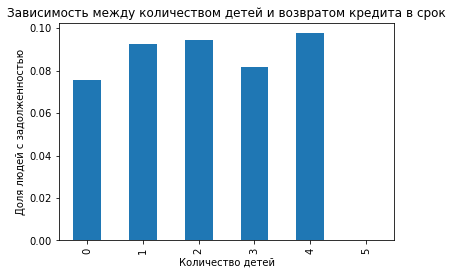

In [21]:
pivot_table_debt_by_children = data.pivot_table(index='children', values='debt', aggfunc=['mean'])
bp_debt_by_children = pivot_table_debt_by_children[('mean', 'debt')].plot(kind='bar')
bp_debt_by_children.set_title('Зависимость между количеством детей и возвратом кредита в срок')
bp_debt_by_children.set_xlabel('Количество детей')
bp_debt_by_children.set_ylabel('Доля людей с задолженностью')

**Вывод:** c увеличением количества детей мы видим увеличение количества людей с задолженностью по возврату кредита, но из тренда выбиваются данные по категории с 3 детьми, где процент должников меньше, чем среди людей с 1 и 2 детьми, а среди людей с пятью детьми и вовсе нет людей с просрочкой по возврату кредита. Однозначно можно сделать вывод, что бездетные чаще платят в срок по кредиту, чем люди с детьми. Так как тренд на увеличение количества должников с увеличением количества детей не подтверждается на двух категориях, возможно, требуется уточнение этих данных на большей выборке.

### 4.2. Исследование зависимости между семейным положением и возвратом кредита в срок<a id='family_status'> </a>

Построим столбчатую диаграмму по оси `х` которой отмечены категории по семейному положению, а по оси `у` - проценты людей с задолженностью по возврату кредитов для каждой категории.

Text(0, 0.5, 'Доля людей с задолженностью')

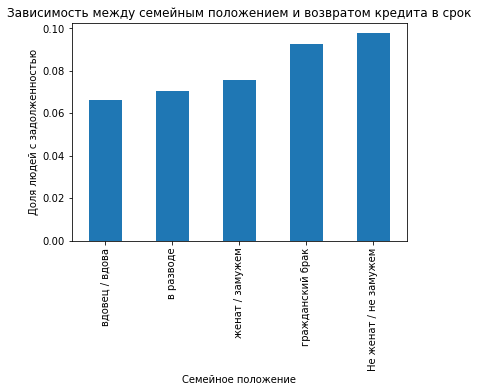

In [22]:
pivot_table_debt_by_family_status = data.pivot_table(index='family_status', values='debt', aggfunc=['mean']).sort_values(by=('mean', 'debt'))
bp_debt_by_family_status = pivot_table_debt_by_family_status[('mean', 'debt')].plot(kind='bar')
bp_debt_by_family_status.set_title('Зависимость между семейным положением и возвратом кредита в срок')
bp_debt_by_family_status.set_xlabel('Семейное положение')
bp_debt_by_family_status.set_ylabel('Доля людей с задолженностью')

**Вывод:** существует следующая зависимость между семейным положением и возвратом кредита в срок:
- люди, не состоящие в официальном браке (не женатые / не замужем / гражданский брак), чаще не возвращают кредит в срок
- люди в разводе и овдовевшие чаще платят в срок, чем люди в браке.

### 4.3.  Исследование зависимости между уровнем дохода и возвратом кредита в срок<a id='income'> </a>

Выведем на экран таблицу соответствия категории ежемесячного дохода диапазону значений ежемесячного дохода.

In [23]:
total_income_dict = pd.DataFrame( data=[['A', '>= 1000001'], ['B', '200001–1000000'], ['C', '50001–200000'], ['D', '30001–50000'], ['E', '0–30000']], columns=['category', 'total_income'])
display(total_income_dict)

,category,total_income
0,A,>= 1000001
1,B,200001–1000000
2,C,50001–200000
3,D,30001–50000
4,E,0–30000


Построим столбчатую диаграмму по оси `х` которой отмечены категории по уровню дохода, а по оси `у` - доля людей с задолженностью по возврату кредитов для каждой категории.

Text(0, 0.5, 'Доля людей с задолженностью')

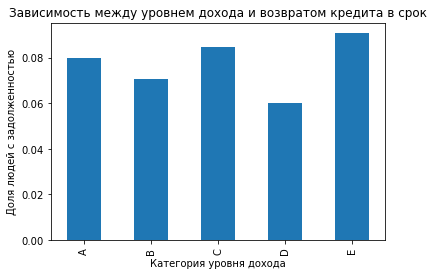

In [24]:
pivot_table_debt_by_total_income = data.pivot_table(index='total_income_category', values='debt', aggfunc=['mean'])
bp_debt_by_total_income = pivot_table_debt_by_total_income[('mean', 'debt')].plot(kind='bar')
bp_debt_by_total_income.set_title('Зависимость между уровнем дохода и возвратом кредита в срок')
bp_debt_by_total_income.set_xlabel('Категория уровня дохода')
bp_debt_by_total_income.set_ylabel('Доля людей с задолженностью')

**Вывод:** прямой зависимости между уровнем дохода и возвратом кредита в срок не прослеживается. Можно отметить, что наибольший процент должников среди людей с наименьшим ежемесячным доходом, а люди с доходом в диапазоне 30001-50000 рублей в месяц чаще всего возращают кредиты в срок. Высокий доход клиента не гаранитирует отсутствие задолженности по оплате кредита.

### 4.4. Исследование влияния цели кредита на возврат кредита в срок<a id='loan_purpose'> </a>

Построим столбчатую диаграмму по оси `х` которой отмечены цель кредита, а по оси `у` - доля людей с задолженностью по возврату кредитов для каждой категории.

Text(0, 0.5, 'Доля людей с задолженностью')

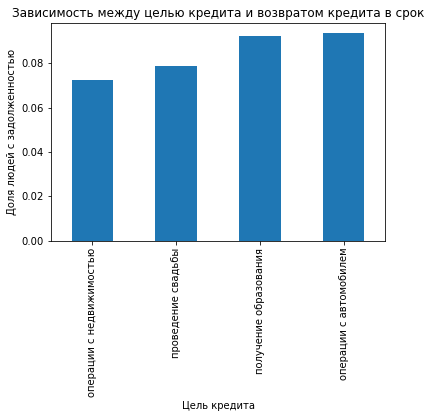

In [25]:
pivot_table_debt_by_purpose = data.pivot_table(index='purpose_category', values='debt', aggfunc=['mean']).sort_values(by=('mean', 'debt'))
bp_debt_by_purpose = pivot_table_debt_by_purpose[('mean', 'debt')].plot(kind='bar')
bp_debt_by_purpose.set_title('Зависимость между целью кредита и возвратом кредита в срок')
bp_debt_by_purpose.set_xlabel('Цель кредита')
bp_debt_by_purpose.set_ylabel('Доля людей с задолженностью')

**Вывод:** чаще всего платят в срок по кредитам, взятым на операции с недвижимостю и проведение свадьбы, а просрочка чаще возникает по кредитам, взятым на получение образования и операции с автомобилем.

## 5. Итоги исследования<a id='research_results'> </a>

В данной работе были исследованы данные от банка о платёжеспособности клиентов на предмет влияния семейного положения и количества детей клиента на факт погашения кредита в срок.

*Количество детей влияет на возврат кредита в срок:* бездетные реже имеют задолженность по возврату кредитов, чем люди с детьми. Чем больше детей, тем выше процент людей, которые имеют задолженность. Однако из тренда выбиваются данные по категории с 3 детьми, где процент должников меньше, чем среди людей с 1 и 2 детьми, а среди людей с пятью детьми и вовсе нет людей с просрочкой по возврату кредита.
*Семейное положение влияет на возврат кредита в срок:* люди, состоящие или бывшие в браке чаще плятят в срок чем люди, не состоявшие в официальном браке, причем разведенные и овдовевшие платят в срок чаще, чем люди в браке. Также было выявлено, что *уровень дохода не влияет на возврат кредита в срок:* высокий доход клиента не гаранитирует отсутствие задолженности по оплате кредита, наибольший процент должников среди людей с наименьшим ежемесячным доходом, а люди с доходом в диапазоне 30001-50000 рублей в месяц являются самой надежной категорией заёмщиков, которые чаще всего возращают кредиты в срок. Чаще всего платят в срок по кредитам, взятым на операции с недвижимостю и проведение свадьбы, а просрочка чаще возникает по кредитам, взятым на получение образования и операции с автомобилем.

Рекомендуется провести работу по выявляению причин пропусков данных об общем трудовом стаже и ежемесячном доходе клиента: проверить анкеты, усилить контроль за наличием данных при приёме анкеты, проверить систему передачи данных. Также рекомендуется провести повторное исследование влияния количества детей на возврат кредита в срок на большей выборке данных для уточнения результатов.